# **EXOPLANET EDA**

The database consists of 4048 potentially habitable planets discovered by ground and space telescopes in the last few decades. The information is sourced from NASA's Exoplanet Archive and includes planets of types: Jovian, Neptunian, Miniterran, Subterran, Terran, and Superterran. Additionally, there are a number of other variables that contribute to achieving the objective of the problem statement, namely determining if a planet is habitable. A more conservative sample of planets is also included, ranging from 1.6 to 3 Earth radii, which are most likely to be similar to our planet. 

In [85]:
# importing all the required libraries for data cleaning and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from tabulate import tabulate
from termcolor import colored
import copy

# importing all the required libraries for formatting, feature selection, train-test split, classification report and model implementation
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, hamming_loss, cohen_kappa_score, classification_report
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# importing all the required classifier algorithms from sklearn module
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier

In [86]:
# reading the csv file from google drive
data = pd.read_csv("exoplanet.csv")

# displaying the first 5 rows of the dataset 
data.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ECCENTRICITY_ERROR_MIN,P_ECCENTRICITY_ERROR_MAX,P_INCLINATION,P_INCLINATION_ERROR_MIN,P_INCLINATION_ERROR_MAX,P_OMEGA,P_OMEGA_ERROR_MIN,P_OMEGA_ERROR_MAX,P_TPERI,P_TPERI_ERROR_MIN,P_TPERI_ERROR_MAX,P_ANGULAR_DISTANCE,P_IMPACT_PARAMETER,P_IMPACT_PARAMETER_ERROR_MIN,P_IMPACT_PARAMETER_ERROR_MAX,P_TEMP_MEASURED,P_GEO_ALBEDO,P_GEO_ALBEDO_ERROR_MIN,P_GEO_ALBEDO_ERROR_MAX,P_DETECTION,P_DETECTION_MASS,P_DETECTION_RADIUS,P_ALT_NAMES,P_ATMOSPHERE,S_NAME,S_RA,S_DEC,S_MAG,S_DISTANCE,S_DISTANCE_ERROR_MIN,S_DISTANCE_ERROR_MAX,S_METALLICITY,S_METALLICITY_ERROR_MIN,S_METALLICITY_ERROR_MAX,S_MASS,S_MASS_ERROR_MIN,S_MASS_ERROR_MAX,S_RADIUS,S_RADIUS_ERROR_MIN,S_RADIUS_ERROR_MAX,S_TYPE,S_AGE,S_AGE_ERROR_MIN,S_AGE_ERROR_MAX,S_TEMPERATURE,S_TEMPERATURE_ERROR_MIN,S_TEMPERATURE_ERROR_MAX,S_DISC,S_MAGNETIC_FIELD,S_LOG_G,S_ALT_NAMES,P_ESCAPE,P_POTENTIAL,P_GRAVITY,P_DENSITY,P_HILL_SPHERE,P_DISTANCE,P_PERIASTRON,P_APASTRON,P_DISTANCE_EFF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,P_TEMP_EQUIL,P_TEMP_EQUIL_MIN,P_TEMP_EQUIL_MAX,P_TYPE,S_RADIUS_EST,S_TYPE_TEMP,S_RA_H,S_RA_T,S_DEC_T,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,326.03000,-0.32,0.32,1.29,-0.05,0.05,0.231,-0.005,0.005,NaN,NaN,NaN,94.8,-1.5,1.5,2452899.6,-1.6,1.6,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,NaN,11 Com,185.17928,17.792868,4.740,93.37,-1.92,1.92,-0.35,-0.09,0.09,2.70,-0.30,0.30,19.00,-2.00,2.00,K0 III,NaN,NaN,NaN,4742.0,-100.0,100.0,NaN,NaN,2.31,"HD 107383, HIP 60202",NaN,NaN,NaN,NaN,0.130671,1.324418,0.99201,1.58799,1.298759,101.011410,64.855456,166.191940,799.44963,722.98875,914.73942,Jovian,19.00,K,12.345286,12 20 43.0286,+17 47 34.3248,163.546800,10.132812,24.763411,12.834754,23.477907,13.586847,23.477907,12.390643,23.477907,34.529063,0.476460,0.642400,0,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,516.21997,-3.20,3.20,1.53,-0.07,0.07,0.080,-0.030,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,NaN,11 UMi,229.27454,71.823898,5.016,125.72,-1.97,1.97,-0.02,NaN,NaN,2.78,-0.69,0.69,29.79,-2.84,2.84,K4 III,NaN,NaN,NaN,4213.0,-46.0,46.0,NaN,NaN,1.93,"HD 136726, HIP 74793",NaN,NaN,NaN,NaN,0.167551,1.534896,1.40760,1.65240,1.531227,107.351180,91.741348,126.426170,819.07569,788.47184,854.28770,Jovian,29.79,K,15.284970,15 17 05.8915,+71 49 26.0328,250.492940,12.770059,31.984271,16.175280,30.323783,17.134143,30.323783,15.615215,30.323783,42.732816,0.193891,0.648683,0,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,185.84000,-0.23,0.23,0.83,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,2452861.4,-1.5,1.5,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radial Velocity,NaN,NaN,NaN,NaN,14 And,352.82257,39.236198,5.227,75.59,-0.71,0.71,-0.24,-0.03,0.03,2.20,-0.20,0.10,11.00,-1.00,1.00,G8 III,NaN,NaN,NaN,4813.0,-20.0,20.0,NaN,NaN,2.63,"HD 221345, HIP 116076",NaN,NaN,NaN,NaN,0.073485,0.830000,0.83000,0.83000,0.830000,84.446427,84.446427,84.446427,772.30746,772.30746,772.30746,Jovian,11.00,G,23.521506,23 31 17.4215,+39 14 10.3128,58.175144,6.025230,14.680087,7.631867,13.918028,8.078404,13.918028,7.367780,13.918028,20.593611,0.502752,0.600010,0,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-0

In [87]:
#Making deep copy of the data
df = copy.deepcopy(data)

In [88]:
# set the max columns to none or the value equal to or greater than the max no of column.
pd.set_option('display.max_columns', None)

In [89]:
df.shape

(4048, 112)

In [90]:
df.describe()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,P_SEMI_MAJOR_AXIS,P_SEMI_MAJOR_AXIS_ERROR_MIN,P_SEMI_MAJOR_AXIS_ERROR_MAX,P_ECCENTRICITY,P_ECCENTRICITY_ERROR_MIN,P_ECCENTRICITY_ERROR_MAX,P_INCLINATION,P_INCLINATION_ERROR_MIN,P_INCLINATION_ERROR_MAX,P_OMEGA,P_OMEGA_ERROR_MIN,P_OMEGA_ERROR_MAX,P_TPERI,P_TPERI_ERROR_MIN,P_TPERI_ERROR_MAX,P_ANGULAR_DISTANCE,P_IMPACT_PARAMETER,P_IMPACT_PARAMETER_ERROR_MIN,P_IMPACT_PARAMETER_ERROR_MAX,P_TEMP_MEASURED,P_GEO_ALBEDO,P_GEO_ALBEDO_ERROR_MIN,P_GEO_ALBEDO_ERROR_MAX,P_DETECTION_MASS,P_DETECTION_RADIUS,P_ALT_NAMES,P_ATMOSPHERE,S_RA,S_DEC,S_MAG,S_DISTANCE,S_DISTANCE_ERROR_MIN,S_DISTANCE_ERROR_MAX,S_METALLICITY,S_METALLICITY_ERROR_MIN,S_METALLICITY_ERROR_MAX,S_MASS,S_MASS_ERROR_MIN,S_MASS_ERROR_MAX,S_RADIUS,S_RADIUS_ERROR_MIN,S_RADIUS_ERROR_MAX,S_AGE,S_AGE_ERROR_MIN,S_AGE_ERROR_MAX,S_TEMPERATURE,S_TEMPERATURE_ERROR_MIN,S_TEMPERATURE_ERROR_MAX,S_DISC,S_MAGNETIC_FIELD,S_LOG_G,P_ESCAPE,P_POTENTIAL,P_GRAVITY,P_DENSITY,P_HILL_SPHERE,P_DISTANCE,P_PERIASTRON,P_APASTRON,P_DISTANCE_EFF,P_FLUX,P_FLUX_MIN,P_FLUX_MAX,P_TEMP_EQUIL,P_TEMP_EQUIL_MIN,P_TEMP_EQUIL_MAX,S_RADIUS_EST,S_RA_H,S_LUMINOSITY,S_HZ_OPT_MIN,S_HZ_OPT_MAX,S_HZ_CON_MIN,S_HZ_CON_MAX,S_HZ_CON0_MIN,S_HZ_CON0_MAX,S_HZ_CON1_MIN,S_HZ_CON1_MAX,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,1598.000000,1467.000000,1467.000000,3139.000000,3105.000000,3105.000000,4048.000000,3.938000e+03,3.807000e+03,3.807000e+03,2367.00000,1563.000000,1564.000000,1380.000000,971.000000,971.000000,844.000000,812.000000,810.000000,746.000000,693.000000,693.000000,4.810000e+02,472.000000,472.000000,2361.000000,1409.000000,1407.000000,1407.000000,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,4048.000000,4048.000000,3869.000000,4042.000000,3967.000000,3967.000000,2842.000000,2446.000000,2446.000000,3283.000000,3034.000000,3063.000000,3723.000000,3576.000000,3604.000000,2.031000e+03,1887.000000,1887.000000,3841.000000,3650.000000,3680.000000,0.0,0.0,3575.0000,706.000000,706.000000,706.000000,706.000000,1546.000000,3978.000000,3978.000000,3978.000000,3978.000000,3.721000e+03,3.721000e+03,3.721000e+03,3721.000000,3721.000000,3721.000000,3844.000000,4048.000000,3.786000e+03,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3786.000000,3.083000e+03,3281.000000,4048.000000,4048.000000,4048.000000,3721.000000,4048.000000,4048.000000,3978.000000
mean,3.0,798.384920,-152.292232,190.289692,4.191426,-0.483990,0.621867,2014.212945,2.309342e+03,-1.073631e+03,1.043257e+03,6.62603,-0.422790,0.417806,0.161551,-0.054147,0.064746,86.228927,-1.074639,1.018000,135.405294,-37.777477,41.399581,2.429249e+06,-143.804175,170.483285,192.953976,0.403195,-0.186633,0.184044,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,245.143596,23.513995,12.709593,631.067197,-56.198281,75.695876,0.014021,-0.118161,0.109330,1.003838,-0.146485,0.150566,1.537142,-0.214480,0.271636,-2.117179e+06,-1.927166,2.964316,5490.154056,-101.432740,99.923255,NaN,NaN,4.3428,5.357040,59.308332,14.440209,6.449325,1.834750,4.047677,3.884638,4.138132,4.022928,6.166291e+02,6.040859e+02,6.439591e+02,804.193202,793.683032,824.937273,1.539951,16.342907,5.786277e+00,0.990972,2.369724,1.255196,2.246710,1.327826,2.246710,1.211666,2.246710,3.513348,1.771002e+35,0.440103,0.049654,0.034091,0.021986,0.261252,5.588647,323.089993,4.011385
std,0.0,1406.808654,783.366353,1082.061976,4.776830,1.409048,2.007592,3.704839,1.167012e+05,5.943181e+04,5.923238e+04,80.78324,5.940422,5.662590,0.187948,0.050142,0.060515,8.410675,2.120326,2.986941,119.784620,45.859539,50.566626,2.492749e+05,658.397999,813.380691,3650.411292,0.264686,0.104331,0.104648,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,86.156500,32.451168,2.955692,807.478191,173.103291,179.597926,0.176512,0.065602,0.056625,0.652903,1.897140,1.888266,3.707808,1.958074,2.611789,6.745148e+07,1.096885,2.1

In [91]:
# Features info
df.info(verbose = True, show_counts = True) #param in the parenthesis displays all the column data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 112 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    P_NAME                        4048 non-null   object 
 1    P_STATUS                      4048 non-null   int64  
 2    P_MASS                        1598 non-null   float64
 3    P_MASS_ERROR_MIN              1467 non-null   float64
 4    P_MASS_ERROR_MAX              1467 non-null   float64
 5    P_RADIUS                      3139 non-null   float64
 6    P_RADIUS_ERROR_MIN            3105 non-null   float64
 7    P_RADIUS_ERROR_MAX            3105 non-null   float64
 8    P_YEAR                        4048 non-null   int64  
 9    P_UPDATED                     4048 non-null   object 
 10   P_PERIOD                      3938 non-null   float64
 11   P_PERIOD_ERROR_MIN            3807 non-null   float64
 12   P_PERIOD_ERROR_MAX            3807 non-null   

In [92]:
# displays the sum of null values in the dataset of all columns
nullvalues = list (zip(df.columns, df.isna().sum()))
print(tabulate(nullvalues, headers=["Column Name", "Null Values"]))

Column Name                     Null Values
----------------------------  -------------
P_NAME                                    0
P_STATUS                                  0
P_MASS                                 2450
P_MASS_ERROR_MIN                       2581
P_MASS_ERROR_MAX                       2581
P_RADIUS                                909
P_RADIUS_ERROR_MIN                      943
P_RADIUS_ERROR_MAX                      943
P_YEAR                                    0
P_UPDATED                                 0
P_PERIOD                                110
P_PERIOD_ERROR_MIN                      241
P_PERIOD_ERROR_MAX                      241
P_SEMI_MAJOR_AXIS                      1681
P_SEMI_MAJOR_AXIS_ERROR_MIN            2485
P_SEMI_MAJOR_AXIS_ERROR_MAX            2484
P_ECCENTRICITY                         2668
P_ECCENTRICITY_ERROR_MIN               3077
P_ECCENTRICITY_ERROR_MAX               3077
P_INCLINATION                          3204
P_INCLINATION_ERROR_MIN         

In [93]:
# discarding columns that have no values i.e. all values are null values (clean plase 1)
df.drop(["P_GEO_ALBEDO", "P_GEO_ALBEDO_ERROR_MIN", "P_GEO_ALBEDO_ERROR_MAX", 
         "P_DETECTION_MASS", "P_DETECTION_RADIUS", "P_ALT_NAMES", "P_ATMOSPHERE", 
         "S_DISC", "S_MAGNETIC_FIELD"], axis = 1, inplace = True)

In [94]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(105)

,Total,Percent
P_TEMP_MEASURED,4043,0.998765
P_TPERI_ERROR_MIN,3576,0.883399
P_TPERI_ERROR_MAX,3576,0.883399
P_TPERI,3567,0.881176
P_OMEGA_ERROR_MAX,3355,0.828804
...,...,...
P_HABITABLE,0,0.000000
S_CONSTELLATION_ABR,0,0.000000
S_CONSTELLATION_ENG,0,0.000000
P_RADIUS_EST,0,0.000000


In [95]:
# discarding unnecessary columns and cokumns having null values more than 50% to avoid bias (clean phase 2)
df.drop(['P_TEMP_MEASURED', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', 'P_TPERI', 'P_DENSITY', 'P_ESCAPE', 'P_GRAVITY', 'P_POTENTIAL', 
         'P_OMEGA_ERROR_MAX', 'P_OMEGA_ERROR_MIN', 'P_OMEGA', 'P_INCLINATION_ERROR_MAX', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION', 
         'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 'P_IMPACT_PARAMETER_ERROR_MIN', 
         'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX', 'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 'P_DISTANCE', 
         'P_APASTRON', 'P_DISTANCE_EFF', 'P_FLUX_MAX', 'P_FLUX_MIN', 'P_TEMP_EQUIL_MAX', 'P_TEMP_EQUIL_MIN','S_RA','S_DEC','S_RA_H',
         'S_RA_T','S_DEC_T', 'S_RADIUS_EST', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 
         'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE'], axis = 1, inplace = True)

## **DATA VISUALIZATION**

In [96]:
# Visualizing the count of Jovian, Superterran, Neptunian, Subterran, Terran and Miniterran planets using bar graph.
fig = px.bar(df, x = "P_TYPE", y = "P_NAME", color = "P_HABITABLE" , title = 'TYPES OF PLANETS (count)', color_continuous_scale="agsunset")
fig.show()

In [97]:
# Visualizing the mass of all planets using scatter plot.
fig = px.scatter(df, x="P_NAME",y="P_MASS", color="P_MASS", hover_name="P_NAME", title = 'MASS OF ALL EXOPLANETS', color_continuous_scale="Viridis")
fig.show()

In [98]:
# Visualizing the Earth Similarity Index of the planets using scatter plot.
fig = px.scatter(df, x="P_NAME",y="P_ESI", color="P_ESI", hover_name="P_NAME", title = 'EARTH SIMILARITY INDEX(ESI) OF EXOPLANETS', color_continuous_scale="Viridis")
fig.show()

In [99]:
# Visualizing the type of the host star of each planet using scatter plot.
fig = px.scatter(df, x="S_TYPE", y="S_NAME", color="S_TEMPERATURE", hover_name="S_NAME", title = 'TYPE OF HOST STAR OF EACH EXOPLANET', color_continuous_scale="Viridis")
fig.show()

In [100]:
# Visualizing the Earth Similary Index of planets located in all constellations using scatter plot and heat map.
fig = px.scatter(df, x="S_CONSTELLATION",y="P_ESI", color="P_ESI", hover_name="P_NAME", title = 'ESI OF PLANETS LOCATED IN ALL CONSTELLATIONS', color_continuous_scale="Viridis")
fig.show()

fig = px.density_heatmap(df, x = "S_CONSTELLATION", y = "P_ESI", title = 'ESI OF PLANETS LOCATED IN ALL CONSTELLATIONS', color_continuous_scale="Viridis", text_auto=True)
fig.show()

In [101]:
# Visualizing the count of Jovian, Superterran, Neptunian, Subterran, Terran and Miniterran planets located in all constellations using heat map.
fig = px.density_heatmap(df, x = "S_CONSTELLATION", y = "P_TYPE", title = 'TYPE OF EXOPLANETS IN ALL CONSTELLATIONS (count)', color_continuous_scale="Viridis", text_auto=True)
fig.show()

In [102]:
# Visualizing the count of Habitability of planets based on Jovian, Superterran, Neptunian, Subterran, Terran and Miniterran planets using heat map.
fig = px.density_heatmap(df, x = "P_TYPE", y = "P_HABITABLE", title = 'HABITABILITY OF EXOPLANET BASED ON TYPE (count)', color_continuous_scale="Viridis", text_auto=True)
fig.show()

In [103]:
# Visualizing the count of Habitability of planets based on K, G, M, F, B, A, O type of stars using heat map.
fig = px.density_heatmap(df, x = "S_TYPE_TEMP", y = "P_HABITABLE", title = 'HABITABILITY OF PLANET BASED ON THE TYPE OF THEIR HOST STAR', color_continuous_scale="Viridis", text_auto=True)
fig.show()

In [104]:
# Visualizing the count of Habitability of planets based on the type of planet's surface temperature using heat map.
fig = px.density_heatmap(df, x = "P_TYPE_TEMP", y = "P_HABITABLE", title = "HABITABILITY BASED ON THE TYPE OF PLANET'S SURFACE TEMPERATURE", color_continuous_scale="Viridis", text_auto=True)
fig.show()

In [105]:
# Visualizing the method used to detect exoplanets using heat map.

fig = px.density_heatmap(df, x = "P_YEAR", y = "P_DETECTION", title = 'METHODS USED TO DETECT EXOPLANETS', nbinsx=20, nbinsy=20, color_continuous_scale="Viridis", text_auto=True)
fig.show()

In [106]:
# DATA CLEANING (clean phase 3) AND FEATURE SELECTION

In [107]:
Null_values = list (zip(df.columns, df.isna().sum()))
print(tabulate(Null_values, headers=["Column Name", "Null Values"]))

Column Name                    Null Values
---------------------------  -------------
P_NAME                                   0
P_STATUS                                 0
P_MASS                                2450
P_RADIUS                               909
P_RADIUS_ERROR_MIN                     943
P_RADIUS_ERROR_MAX                     943
P_YEAR                                   0
P_UPDATED                                0
P_PERIOD                               110
P_PERIOD_ERROR_MIN                     241
P_PERIOD_ERROR_MAX                     241
P_SEMI_MAJOR_AXIS                     1681
P_SEMI_MAJOR_AXIS_ERROR_MIN           2485
P_SEMI_MAJOR_AXIS_ERROR_MAX           2484
P_ECCENTRICITY                        2668
P_ANGULAR_DISTANCE                    1687
P_DETECTION                              0
S_NAME                                   0
S_MAG                                  179
S_DISTANCE                               6
S_DISTANCE_ERROR_MIN                    81
S_DISTANCE_

In [108]:
j=0
for i in df.columns.values.tolist():
    if Null_values[j][1]>=df.shape[0]*0.1225:      
        df = df.drop(columns=i)
    j=j+1

m = np.core.defchararray.find(df.columns.values.astype(str), 'ERROR') >= 0
df=df.loc[:,~m]

df=df.dropna()
df[df != 'nan']

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_NAME,S_MAG,S_DISTANCE,S_RADIUS,S_TEMPERATURE,S_LOG_G,S_ALT_NAMES,P_PERIASTRON,P_FLUX,P_TEMP_EQUIL,P_TYPE,S_TYPE_TEMP,S_LUMINOSITY,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3,2007,2014-05-14,326.03000,Radial Velocity,11 Com,4.740,93.37,19.000,4742.0,2.310,"HD 107383, HIP 60202",0.99201,101.011410,799.44963,Jovian,K,163.546800,0,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.290
1,11 UMi b,3,2009,2018-09-06,516.21997,Radial Velocity,11 UMi,5.016,125.72,29.790,4213.0,1.930,"HD 136726, HIP 74793",1.40760,107.351180,819.07569,Jovian,K,250.492940,0,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.530
2,14 And b,3,2008,2014-05-14,185.84000,Radial Velocity,14 And,5.227,75.59,11.000,4813.0,2.630,"HD 221345, HIP 116076",0.83000,84.446427,772.30746,Jovian,G,58.175144,0,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.830
3,14 Her b,3,2002,2018-09-06,1773.40000,Radial Velocity,14 Her,6.610,17.94,0.930,5338.0,4.450,"HD 145675, HIP 79248",1.84590,0.078887,131.38424,Jovian,K,0.629171,0,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.930
4,16 Cyg B b,3,1996,2018-09-06,798.50000,Radial Velocity,16 Cyg B,6.250,21.15,1.130,5750.0,4.360,"HD 186427, HIP 96901",0.53120,0.618972,202.22783,Jovian,G,1.250596,1,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,tau Cet e,3,2017,2017-08-17,162.87000,Radial Velocity,tau Cet,3.500,3.60,0.793,5344.0,-4.995,"HD 10700, HIP 8102",0.44116,1.613943,285.39203,Terran,G,0.459516,1,0,Warm,1,0.737081,Cetus,Cet,Whale,1.809973,3.931532,0.538
4036,tau Cet f,3,2017,2017-08-17,636.13000,Radial Velocity,tau Cet,3.500,3.60,0.793,5344.0,-4.995,"HD 10700, HIP 8102",1.12056,0.261590,181.31867,Terran,G,0.459516,0,0,Cold,0,0.538662,Cetus,Cet,Whale,1.809973,3.931532,1.334
4037,tau Cet g,3,2017,2017-08-17,20.00000,Radial Velocity,tau Cet,3.500,3.60,0.793,5344.0,-4.995,"HD 10700, HIP 8102",0.12502,26.024396,575.03789,Terran,G,0.459516,0,0,Hot,0,0.342664,Cetus,Cet,Whale,1.178565,1.751232,0.133
4038,tau Cet h,3,2017,2017-08-17,49.41000,Radial Velocity,tau Cet,3.500,3.60,0.793,5344.0,-4.995,"HD 10700, HIP 8102",0.18711,7.996323,424.09232,Terran,G,0.459516,0,0,Hot,0,0.446574,Cetus,Cet,Whale,1.193246,1.830689,0.243


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3317 entries, 0 to 4039
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   P_NAME                 3317 non-null   object 
 1   P_STATUS               3317 non-null   int64  
 2   P_YEAR                 3317 non-null   int64  
 3   P_UPDATED              3317 non-null   object 
 4   P_PERIOD               3317 non-null   float64
 5   P_DETECTION            3317 non-null   object 
 6   S_NAME                 3317 non-null   object 
 7   S_MAG                  3317 non-null   float64
 8   S_DISTANCE             3317 non-null   float64
 9   S_RADIUS               3317 non-null   float64
 10  S_TEMPERATURE          3317 non-null   float64
 11  S_LOG_G                3317 non-null   float64
 12  S_ALT_NAMES            3317 non-null   object 
 13  P_PERIASTRON           3317 non-null   float64
 14  P_FLUX                 3317 non-null   float64
 15  P_TEMP_EQ

In [110]:
# TRANSFORMING FEATURES

In [111]:
df["P_TYPE_TEMP"] = LabelEncoder().fit_transform(df["P_TYPE_TEMP"])
df["P_TYPE"] = LabelEncoder().fit_transform(df["P_TYPE"])
df["S_TYPE_TEMP"] = LabelEncoder().fit_transform(df["S_TYPE_TEMP"])
df["P_DETECTION"] = LabelEncoder().fit_transform(df["P_DETECTION"])
df.head()

,P_NAME,P_STATUS,P_YEAR,P_UPDATED,P_PERIOD,P_DETECTION,S_NAME,S_MAG,S_DISTANCE,S_RADIUS,S_TEMPERATURE,S_LOG_G,S_ALT_NAMES,P_PERIASTRON,P_FLUX,P_TEMP_EQUIL,P_TYPE,S_TYPE_TEMP,S_LUMINOSITY,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3,2007,2014-05-14,326.03000,2,11 Com,4.740,93.37,19.00,4742.0,2.31,"HD 107383, HIP 60202",0.99201,101.011410,799.44963,0,4,163.546800,0,0,1,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3,2009,2018-09-06,516.21997,2,11 UMi,5.016,125.72,29.79,4213.0,1.93,"HD 136726, HIP 74793",1.40760,107.351180,819.07569,0,4,250.492940,0,0,1,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3,2008,2014-05-14,185.84000,2,14 And,5.227,75.59,11.00,4813.0,2.63,"HD 221345, HIP 116076",0.83000,84.446427,772.30746,0,3,58.175144,0,0,1,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3,2002,2018-09-06,1773.40000,2,14 Her,6.610,17.94,0.93,5338.0,4.45,"HD 145675, HIP 79248",1.84590,0.078887,131.38424,0,4,0.629171,0,0,0,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3,1996,2018-09-06,798.50000,2,16 Cyg B,6.250,21.15,1.13,5750.0,4.36,"HD 186427, HIP 96901",0.53120,0.618972,202.22783,0,3,1.250596,1,1,2,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [112]:
df.columns.values.tolist()

['P_NAME',
 'P_STATUS',
 'P_YEAR',
 'P_UPDATED',
 'P_PERIOD',
 'P_DETECTION',
 'S_NAME',
 'S_MAG',
 'S_DISTANCE',
 'S_RADIUS',
 'S_TEMPERATURE',
 'S_LOG_G',
 'S_ALT_NAMES',
 'P_PERIASTRON',
 'P_FLUX',
 'P_TEMP_EQUIL',
 'P_TYPE',
 'S_TYPE_TEMP',
 'S_LUMINOSITY',
 'P_HABZONE_OPT',
 'P_HABZONE_CON',
 'P_TYPE_TEMP',
 'P_HABITABLE',
 'P_ESI',
 'S_CONSTELLATION',
 'S_CONSTELLATION_ABR',
 'S_CONSTELLATION_ENG',
 'P_RADIUS_EST',
 'P_MASS_EST',
 'P_SEMI_MAJOR_AXIS_EST']

In [113]:
# TRAIN AND TEST SPLIT

In [114]:
features = df[['P_TYPE_TEMP','P_PERIOD','S_DISTANCE','S_TEMPERATURE','P_TYPE','P_HABZONE_OPT','P_RADIUS_EST']]
target = df['P_HABITABLE']

In [115]:
print(df.shape, features.shape, target.shape)

(3317, 30) (3317, 7) (3317,)


In [116]:
target.value_counts()

P_HABITABLE
0    3288
2      24
1       5
Name: count, dtype: int64

In [117]:
zeros = df[df['P_HABITABLE'] == 0]
ones = df[df['P_HABITABLE'] == 1]
twos = df[df['P_HABITABLE'] == 2]

In [118]:
print(zeros.shape, ones.shape, twos.shape)

(3288, 30) (5, 30) (24, 30)


In [119]:
# HANDLING THE UNBALANCED DATASET USING OVERSAMPLING.

In [120]:

sampling_strategy = {0: 3288, 1: 830, 2: 1380}
os = RandomOverSampler(sampling_strategy = sampling_strategy)
X_rosampled, y_rosampled = os.fit_resample(features, target)
print("The number of classes before fit {}".format(Counter(target)))
print("The number of classes after fit{}".format(Counter(y_rosampled)))

The number of classes before fit Counter({0: 3288, 2: 24, 1: 5})
The number of classes after fitCounter({0: 3288, 2: 1380, 1: 830})


In [121]:
X_rosampled.shape, y_rosampled.shape

((5498, 7), (5498,))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_rosampled, y_rosampled, test_size=0.30, random_state=12345)

# Normalize Features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [123]:
X_rosampled.head(20)

,P_TYPE_TEMP,P_PERIOD,S_DISTANCE,S_TEMPERATURE,P_TYPE,P_HABZONE_OPT,P_RADIUS_EST
0,1,326.030000,93.37,4742.0,0,0,12.082709
1,1,516.219970,125.72,4213.0,0,0,12.229641
2,1,185.840000,75.59,4813.0,0,0,12.848516
3,0,1773.400000,17.94,5338.0,0,0,12.865261
4,2,798.500000,21.15,5750.0,0,1,13.421749
5,1,993.300000,76.38,4979.0,0,0,12.424038
6,1,30.350600,96.25,4893.0,0,0,13.823874
7,1,452.800000,72.21,5098.0,0,0,13.356050
8,1,883.000000,72.21,5098.0,0,0,13.858291
9,1,335.100010,44.71,6331.0,0,0,12.264370


In [124]:
# MODEL IMPLEMENTATION

DECISION TREE CLASSIFIER REPORT
Accuracy = 0.7781818181818182
Hamming Loss = 0.22181818181818183
Cohen's Kappa = 0.5373498627907939
Time taken = 0.004376411437988281

               precision    recall  f1-score   support

           0    0.72949   1.00000   0.84359       987
           1    1.00000   1.00000   1.00000       246
           2    1.00000   0.12230   0.21795       417

    accuracy                        0.77818      1650
   macro avg    0.90983   0.70743   0.68718      1650
weighted avg    0.83819   0.77818   0.70879      1650



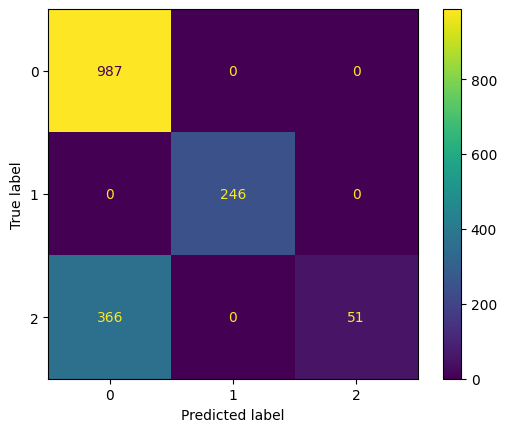

In [125]:
# Decision Tree Classifier

#DTR variable declared for DecisionTreeClassifier function.
DTR = DecisionTreeClassifier()

# Prediction
DTR.fit(X_train,y_train)
y_pred = DTR.predict(X_test)

# Classification Report
t0 = time.time()
print(colored('DECISION TREE CLASSIFIER REPORT', 'green', attrs=['bold'])) 
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
# print('Mean Accuracy: {}'.format(mean(scores)))
# print('Standard Deviation: {}'.format(std(scores)))
print("Hamming Loss = {}".format(hamming_loss(y_test, y_pred)))
print("Cohen's Kappa = {}".format(cohen_kappa_score(y_test, y_pred)))
print("Time taken = {}".format(time.time() - t0))
print("\n", classification_report(y_test, y_pred, digits=5))

# Confusion Matrix
fig = ConfusionMatrixDisplay.from_estimator(DTR, X_test, y_test, cmap= "viridis") 
plt.show()

RANDOM FOREST CLASSIFIER REPORT
Accuracy = 0.8290909090909091
Hamming Loss = 0.1709090909090909
Cohen's Kappa = 0.6561448315309203
Time taken = 0.0058858394622802734

               precision    recall  f1-score   support

           0    0.77778   1.00000   0.87500       987
           1    1.00000   1.00000   1.00000       246
           2    1.00000   0.32374   0.48913       417

    accuracy                        0.82909      1650
   macro avg    0.92593   0.77458   0.78804      1650
weighted avg    0.86707   0.82909   0.79612      1650



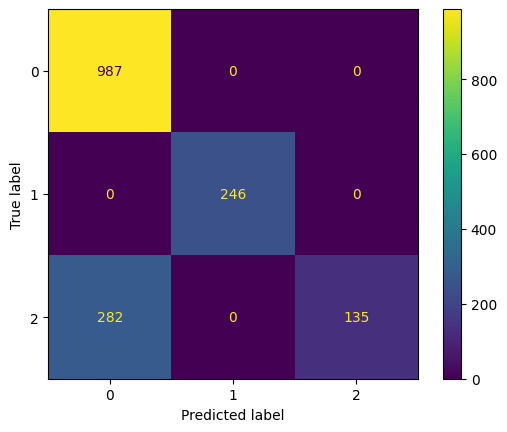

In [126]:
# Random Forest Classifier

#RFC variable declared for RandomForestClassifier function.
RFC = RandomForestClassifier(n_jobs=2)

# Prediction
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)

# Classification Report
t0 = time.time()
print(colored('RANDOM FOREST CLASSIFIER REPORT', 'green', attrs=['bold'])) 
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("Hamming Loss = {}".format(hamming_loss(y_test, y_pred)))
print("Cohen's Kappa = {}".format(cohen_kappa_score(y_test, y_pred)))
print("Time taken = {}".format(time.time() - t0))
print("\n", classification_report(y_test, y_pred, digits=5))

# Confusion Matrix
fig = ConfusionMatrixDisplay.from_estimator(RFC, X_test, y_test, cmap= "viridis") 
plt.show()

SUPPORT VECTOR CLASSIFIER REPORT
Accuracy = 1.0
Hamming Loss = 0.0
Cohen's Kappa = 1.0
Time taken = 0.006141185760498047

               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       987
           1    1.00000   1.00000   1.00000       246
           2    1.00000   1.00000   1.00000       417

    accuracy                        1.00000      1650
   macro avg    1.00000   1.00000   1.00000      1650
weighted avg    1.00000   1.00000   1.00000      1650



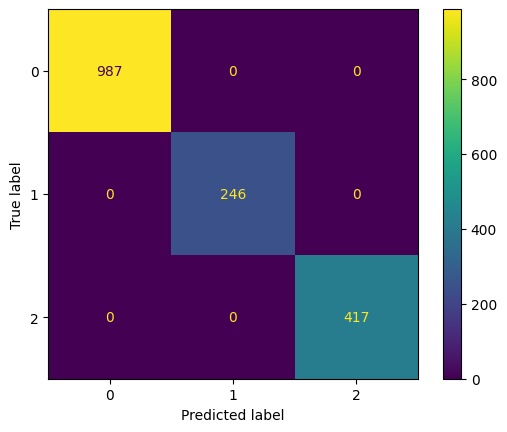

In [127]:
# Support Vector Classifier

#SVCC variable declared for SupportVectorClassifier function.
SVCC = SVC(kernel='linear',C=100)

# Prediction
SVCC.fit(X_train,y_train)
y_pred = SVCC.predict(X_test)

# Classification Report
t0 = time.time()
print(colored('SUPPORT VECTOR CLASSIFIER REPORT', 'green', attrs=['bold'])) 
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("Hamming Loss = {}".format(hamming_loss(y_test, y_pred)))
print("Cohen's Kappa = {}".format(cohen_kappa_score(y_test, y_pred)))
print("Time taken = {}".format(time.time() - t0))
print("\n", classification_report(y_test, y_pred, digits=5))

# Confusion Matrix
fig = ConfusionMatrixDisplay.from_estimator(SVCC, X_test, y_test, cmap= "viridis") 
plt.show()

LOGISTIC REGRESSION CLASSIFIER REPORT
Accuracy = 0.9975757575757576
Hamming Loss = 0.0024242424242424242
Cohen's Kappa = 0.9956470294933538
Time taken = 0.0020339488983154297

               precision    recall  f1-score   support

           0    1.00000   0.99595   0.99797       987
           1    1.00000   1.00000   1.00000       246
           2    0.99050   1.00000   0.99523       417

    accuracy                        0.99758      1650
   macro avg    0.99683   0.99865   0.99773      1650
weighted avg    0.99760   0.99758   0.99758      1650



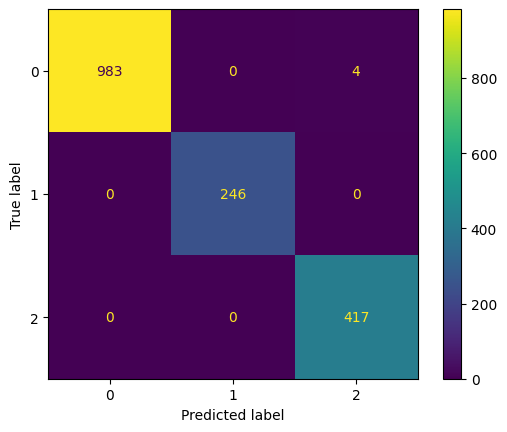

In [128]:
# Logistic Regression

#LRC variable declared for LogisticRegression function.
LRC = LogisticRegression(random_state=0)

# Prediction
LRC.fit(X_train,y_train)
y_pred = LRC.predict(X_test)

# Classification Report
t0 = time.time()
print(colored('LOGISTIC REGRESSION CLASSIFIER REPORT', 'green', attrs=['bold'])) 
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("Hamming Loss = {}".format(hamming_loss(y_test, y_pred)))
print("Cohen's Kappa = {}".format(cohen_kappa_score(y_test, y_pred)))
print("Time taken = {}".format(time.time() - t0))
print("\n", classification_report(y_test, y_pred, digits=5))

# Confusion Matrix
fig = ConfusionMatrixDisplay.from_estimator(LRC, X_test, y_test, cmap= "viridis") 
plt.show()

XGBOOST CLASSIFIER REPORT
Accuracy = 1.0
Hamming Loss = 0.0
Cohen's Kappa = 1.0
Time taken = 0.010980606079101562

               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       987
           1    1.00000   1.00000   1.00000       246
           2    1.00000   1.00000   1.00000       417

    accuracy                        1.00000      1650
   macro avg    1.00000   1.00000   1.00000      1650
weighted avg    1.00000   1.00000   1.00000      1650



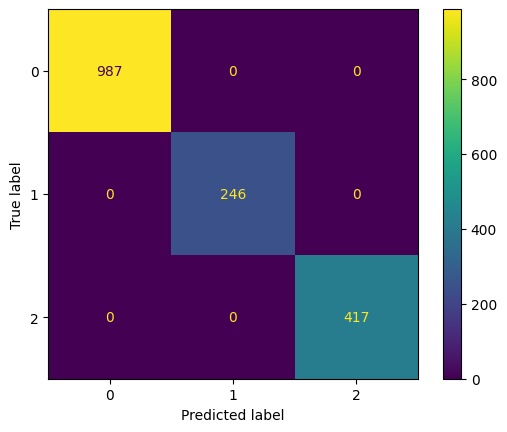

In [129]:
#XGBoost Classifier

#XGBC variable declared for XGBClassifier function.
XGBC = XGBClassifier()

# Prediction
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)

# Classification Report
t0 = time.time()
print(colored('XGBOOST CLASSIFIER REPORT', 'green', attrs=['bold'])) 
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("Hamming Loss = {}".format(hamming_loss(y_test, y_pred)))
print("Cohen's Kappa = {}".format(cohen_kappa_score(y_test, y_pred)))
print("Time taken = {}".format(time.time() - t0))
print("\n", classification_report(y_test, y_pred, digits=5))

# Confusion Matrix
fig = ConfusionMatrixDisplay.from_estimator(XGBC, X_test, y_test, cmap= "viridis") 
plt.show()